In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# importing data
data = pd.read_csv('Downloads/data set/insurance_claims.csv')
data

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,1,?,87200,17440,8720,61040,Honda,Accord,2006,N
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,3,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,1,YES,46980,5220,5220,36540,Audi,A5,1998,N


In [3]:
# There are some missing values denoted by '?', replacing missing values with np.nan

data.replace('?', np.nan, inplace = True)

In [4]:
# droping columns that aren't necessary for prediction

data.drop(['age','policy_number','policy_bind_date','policy_state','insured_hobbies','insured_zip',
           'incident_city','incident_date','incident_state','incident_city','incident_location','insured_hobbies',
           'auto_make','auto_model','auto_year'],axis =1,inplace=True)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   policy_csl                   1000 non-null   object 
 2   policy_deductable            1000 non-null   int64  
 3   policy_annual_premium        1000 non-null   float64
 4   umbrella_limit               1000 non-null   int64  
 5   insured_sex                  1000 non-null   object 
 6   insured_education_level      1000 non-null   object 
 7   insured_occupation           1000 non-null   object 
 8   insured_relationship         1000 non-null   object 
 9   capital-gains                1000 non-null   int64  
 10  capital-loss                 1000 non-null   int64  
 11  incident_type                1000 non-null   object 
 12  collision_type               822 non-null    object 
 13  incident_severity  

In [6]:
# missing values
data.isna().any()

months_as_customer             False
policy_csl                     False
policy_deductable              False
policy_annual_premium          False
umbrella_limit                 False
insured_sex                    False
insured_education_level        False
insured_occupation             False
insured_relationship           False
capital-gains                  False
capital-loss                   False
incident_type                  False
collision_type                  True
incident_severity              False
authorities_contacted          False
incident_hour_of_the_day       False
number_of_vehicles_involved    False
property_damage                 True
bodily_injuries                False
witnesses                      False
police_report_available         True
total_claim_amount             False
injury_claim                   False
property_claim                 False
vehicle_claim                  False
fraud_reported                 False
dtype: bool

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_24180\2051664352.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


<AxesSubplot: >

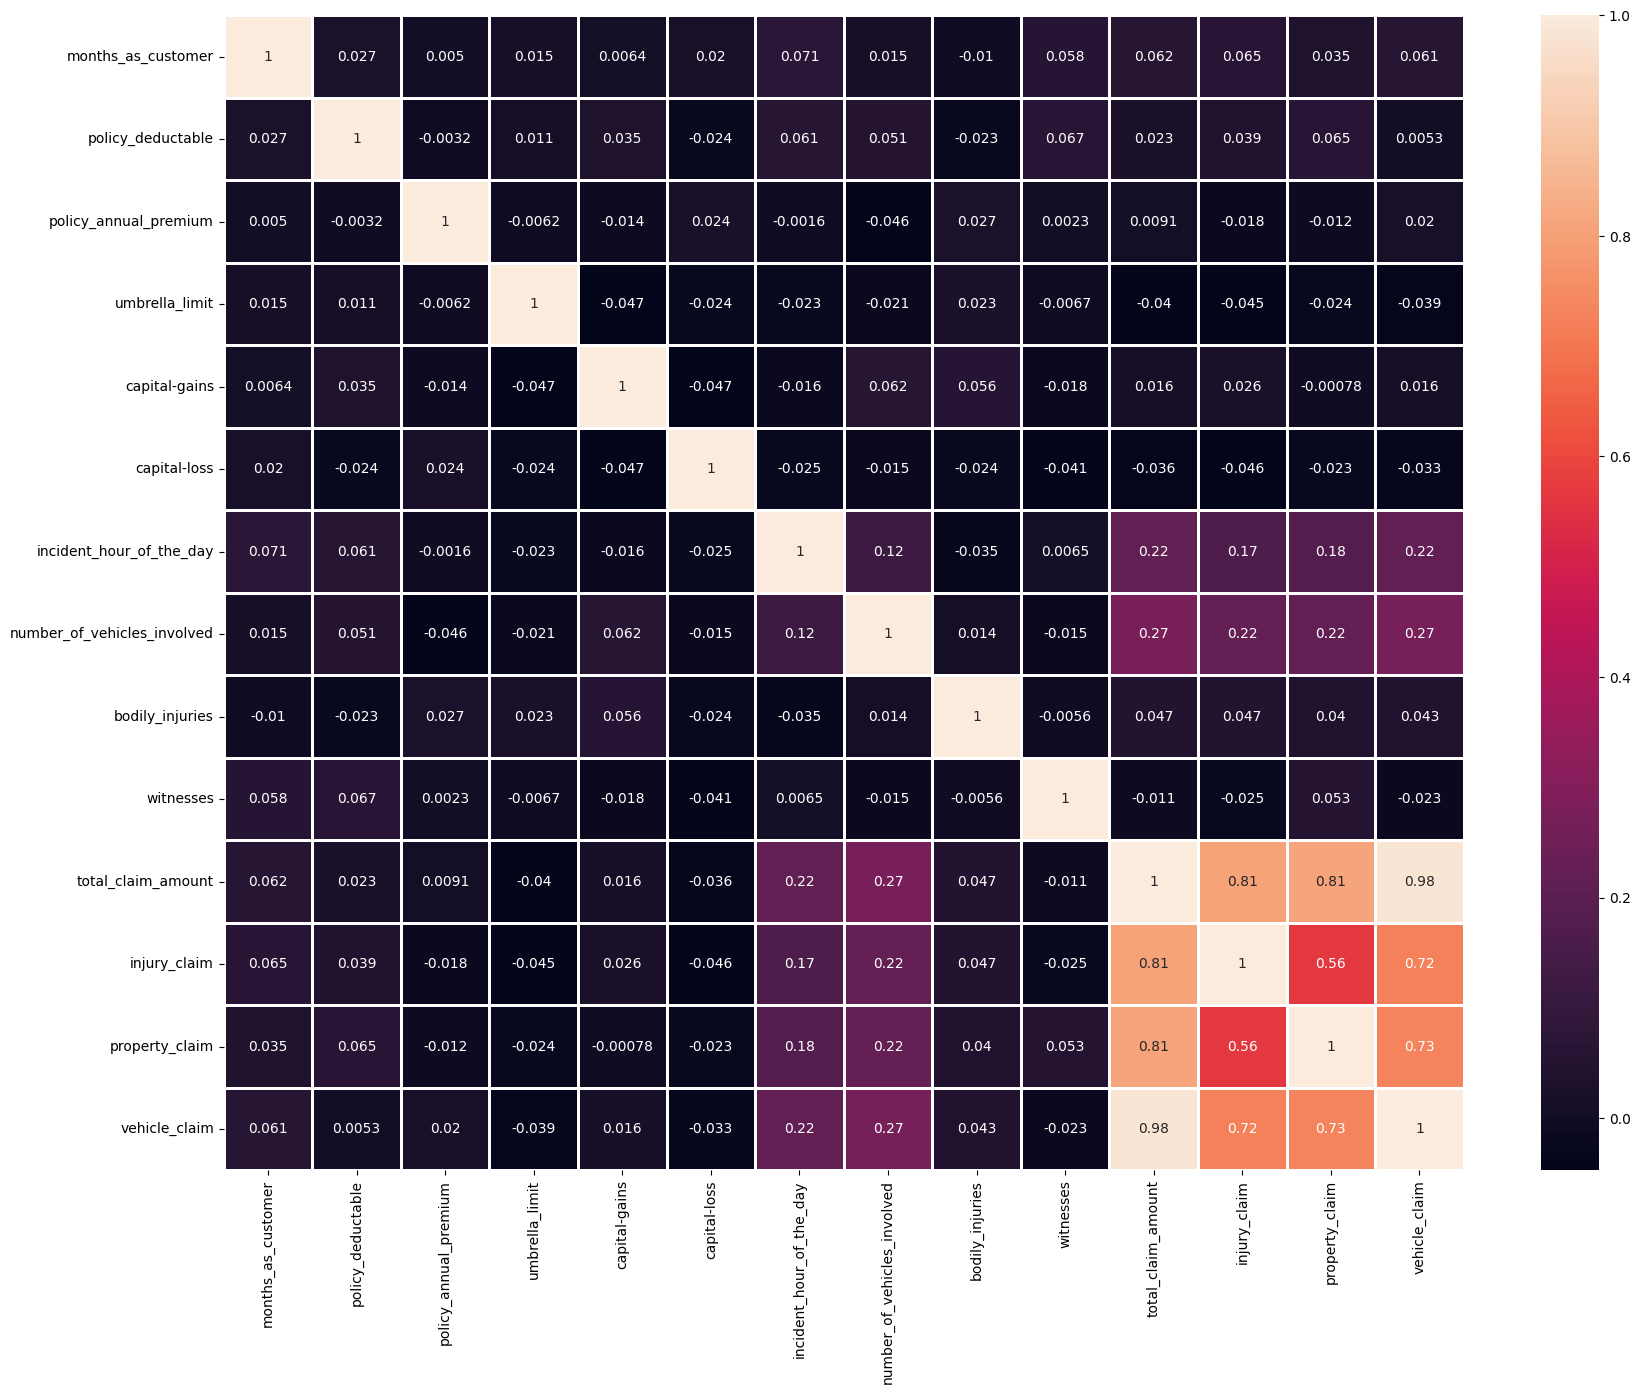

In [7]:
# checking correlation of the dataset
corr = data.corr()
plt.figure(figsize=(20,15))
sns.heatmap(corr,annot=True,linewidths=1)

In [8]:
# seems like the data has multicollnearity 

data.drop('total_claim_amount',axis =1,inplace =True)

In [9]:
data.head()

,months_as_customer,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_relationship,capital-gains,...,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,injury_claim,property_claim,vehicle_claim,fraud_reported
0,328,250/500,1000,1406.91,0,MALE,MD,craft-repair,husband,53300,...,5,1,YES,1,2,YES,6510,13020,52080,Y
1,228,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,other-relative,0,...,8,1,NaN,0,0,NaN,780,780,3510,Y
2,134,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,own-child,35100,...,7,3,NO,2,3,NO,7700,3850,23100,N
3,256,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,unmarried,48900,...,5,1,NaN,1,2,NO,6340,6340,50720,Y
4,228,500/1000,1000,1583.91,6000000,MALE,Associate,sales,unmarried,66000,...,20,1,NO,0,1,NO,1300,650,4550,N


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   policy_csl                   1000 non-null   object 
 2   policy_deductable            1000 non-null   int64  
 3   policy_annual_premium        1000 non-null   float64
 4   umbrella_limit               1000 non-null   int64  
 5   insured_sex                  1000 non-null   object 
 6   insured_education_level      1000 non-null   object 
 7   insured_occupation           1000 non-null   object 
 8   insured_relationship         1000 non-null   object 
 9   capital-gains                1000 non-null   int64  
 10  capital-loss                 1000 non-null   int64  
 11  incident_type                1000 non-null   object 
 12  collision_type               822 non-null    object 
 13  incident_severity  

In [11]:
# features and target variable separation

x = data.drop('fraud_reported',axis=1)
y = data['fraud_reported']

In [12]:
# Looking for number of unique values in each column
data.nunique()

months_as_customer             391
policy_csl                       3
policy_deductable                3
policy_annual_premium          991
umbrella_limit                  11
insured_sex                      2
insured_education_level          7
insured_occupation              14
insured_relationship             6
capital-gains                  338
capital-loss                   354
incident_type                    4
collision_type                   3
incident_severity                4
authorities_contacted            5
incident_hour_of_the_day        24
number_of_vehicles_involved      4
property_damage                  2
bodily_injuries                  3
witnesses                        4
police_report_available          2
injury_claim                   638
property_claim                 626
vehicle_claim                  726
fraud_reported                   2
dtype: int64

In [13]:
# separating categorical data
cat_data = x.select_dtypes(include='object')
cat_data

,policy_csl,insured_sex,insured_education_level,insured_occupation,insured_relationship,incident_type,collision_type,incident_severity,authorities_contacted,property_damage,police_report_available
0,250/500,MALE,MD,craft-repair,husband,Single Vehicle Collision,Side Collision,Major Damage,Police,YES,YES
1,250/500,MALE,MD,machine-op-inspct,other-relative,Vehicle Theft,NaN,Minor Damage,Police,NaN,NaN
2,100/300,FEMALE,PhD,sales,own-child,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NO,NO
3,250/500,FEMALE,PhD,armed-forces,unmarried,Single Vehicle Collision,Front Collision,Major Damage,Police,NaN,NO
4,500/1000,MALE,Associate,sales,unmarried,Vehicle Theft,NaN,Minor Damage,None,NO,NO
...,...,...,...,...,...,...,...,...,...,...,...
995,500/1000,FEMALE,Masters,craft-repair,unmarried,Single Vehicle Collision,Front Collision,Minor Damage,Fire,YES,NaN
996,100/300,FEMALE,PhD,prof-specialty,wife,Single Vehicle Collision,Rear Collision,Major Damage,Fire,YES,NaN
997,250/500,FEMALE,Masters,armed-forces,other-relative,Multi-vehicle Collision,Side Collision,Minor Damage,Police,NaN,YES
998,500/1000,MALE,Associate,handlers-cleaners,wife,Single Vehicle Collision,Rear Collision,Major Damage,Other,NaN,YES


In [14]:
# One Hot Encoding
dummies = pd.get_dummies(cat_data, drop_first=True)
dummies

,policy_csl_250/500,policy_csl_500/1000,insured_sex_MALE,insured_education_level_College,insured_education_level_High School,insured_education_level_JD,insured_education_level_MD,insured_education_level_Masters,insured_education_level_PhD,insured_occupation_armed-forces,...,collision_type_Side Collision,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police,property_damage_YES,police_report_available_YES
0,1,0,1,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,1,1,1
1,1,0,1,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,1,0,0
4,0,1,1,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,1,0,0,0,0,0,1,0,0,...,0,1,0,0,1,0,0,0,1,0
996,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
997,1,0,0,0,0,0,0,1,0,1,...,1,1,0,0,0,0,0,1,0,1
998,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1


In [15]:
# separating numerical data
num_data = x.select_dtypes(include = 'int64')

In [16]:
# creating dataframe including the numerical and dummies
x = pd.concat([num_data,dummies],axis =1)

In [17]:
x

,months_as_customer,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,...,collision_type_Side Collision,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police,property_damage_YES,police_report_available_YES
0,328,1000,0,53300,0,5,1,1,2,6510,...,1,0,0,0,0,0,0,1,1,1
1,228,2000,5000000,0,0,8,1,0,0,780,...,0,1,0,0,0,0,0,1,0,0
2,134,2000,5000000,35100,0,7,3,2,3,7700,...,0,1,0,0,0,0,0,1,0,0
3,256,2000,6000000,48900,-62400,5,1,1,2,6340,...,0,0,0,0,0,0,0,1,0,0
4,228,1000,6000000,66000,-46000,20,1,0,1,1300,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,1000,0,0,0,20,1,0,1,17440,...,0,1,0,0,1,0,0,0,1,0
996,285,1000,0,70900,0,23,1,2,3,18080,...,0,0,0,0,1,0,0,0,1,0
997,130,500,3000000,35100,0,4,3,2,3,7500,...,1,1,0,0,0,0,0,1,0,1
998,458,2000,5000000,0,0,2,1,0,1,5220,...,0,0,0,0,0,0,1,0,0,1


In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
# Now to perform model the numerical data has to scaled

scaler = StandardScaler()
x_scaled = scaler.fit_transform(num_data)

In [20]:
# creating a dataframe using the scaled data to fit it again to the x series

x_scaled = pd.DataFrame(x_scaled, columns=num_data.columns, index=data.index)

In [21]:
# fitting the scaled data and dummies

x = pd.concat([x_scaled,dummies],axis=1)
x

,months_as_customer,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,...,collision_type_Side Collision,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police,property_damage_YES,police_report_available_YES
0,1.078140,-0.222383,-0.479476,1.011331,0.953851,-0.956261,-0.823865,0.009759,0.461838,-0.189283,...,1,0,0,0,0,0,0,1,1,1
1,0.208995,1.412784,1.697980,-0.901927,0.953851,-0.524475,-0.823865,-1.210174,-1.338700,-1.363822,...,0,1,0,0,0,0,0,1,0,0
2,-0.608002,1.412784,1.697980,0.358023,0.953851,-0.668404,1.140056,1.229693,1.362107,0.054644,...,0,1,0,0,0,0,0,1,0,0
3,0.452355,1.412784,2.133471,0.853388,-1.267577,-0.956261,-0.823865,0.009759,0.461838,-0.224130,...,0,0,0,0,0,0,0,1,0,0
4,0.208995,-0.222383,2.133471,1.467210,-0.683741,1.202666,-0.823865,-1.210174,-0.438431,-1.257232,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-1.746582,-0.222383,-0.479476,-0.901927,0.953851,1.202666,-0.823865,-1.210174,-0.438431,2.051155,...,0,1,0,0,1,0,0,0,1,0
996,0.704407,-0.222383,-0.479476,1.643100,0.953851,1.634452,-0.823865,1.229693,1.362107,2.182342,...,0,0,0,0,1,0,0,0,1,0
997,-0.642767,-1.039966,0.826998,0.358023,0.953851,-1.100189,1.140056,1.229693,1.362107,0.013648,...,1,1,0,0,0,0,0,1,0,1
998,2.208028,1.412784,1.697980,-0.901927,0.953851,-1.388046,-0.823865,-1.210174,-0.438431,-0.453708,...,0,0,0,0,0,0,1,0,0,1


In [22]:
# splitting data into training set and test set

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25,random_state=30)

In [23]:
len(x_train),len(x_test),len(y_train),len(y_test)

(750, 250, 750, 250)

# Models

### Logistic Regression

In [24]:
from sklearn.linear_model import LogisticRegression

log = LogisticRegression()
log.fit(x_train,y_train)

LogisticRegression()

In [25]:
# Accuracy score and classification report
from sklearn.metrics import accuracy_score,classification_report

log_train_score = accuracy_score(y_train,log.predict(x_train))
log_test_score = accuracy_score(y_test,log.predict(x_test))

In [26]:
# Train model accuracy
log_train_score

0.8253333333333334

In [27]:
#test model accuracy
log_test_score

0.804

In [28]:
# Classification Report
print(classification_report(y_test,log.predict(x_test)))

              precision    recall  f1-score   support

           N       0.83      0.93      0.88       189
           Y       0.66      0.41      0.51        61

    accuracy                           0.80       250
   macro avg       0.74      0.67      0.69       250
weighted avg       0.79      0.80      0.79       250



# Decision Tree

In [29]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
tree.fit(x_train,y_train)

DecisionTreeClassifier()

In [30]:
# Train score
tree_train_score = accuracy_score(y_train,tree.predict(x_train))
tree_train_score

1.0

In [31]:
# test score
tree_test_score = accuracy_score(y_test,tree.predict(x_test))
tree_test_score

0.704

In [32]:
# Classification Report
print(classification_report(y_test,tree.predict(x_test)))

              precision    recall  f1-score   support

           N       0.82      0.78      0.80       189
           Y       0.41      0.48      0.44        61

    accuracy                           0.70       250
   macro avg       0.61      0.63      0.62       250
weighted avg       0.72      0.70      0.71       250



# RandomForest

In [33]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [34]:
# Train score
rf_train_score = accuracy_score(y_train,rf.predict(x_train))
rf_train_score

1.0

In [35]:
# test score
rf_test_score = accuracy_score(y_test,rf.predict(x_test))
rf_test_score

0.792

In [36]:
# Classification Report
print(classification_report(y_test,rf.predict(x_test)))

              precision    recall  f1-score   support

           N       0.80      0.97      0.88       189
           Y       0.74      0.23      0.35        61

    accuracy                           0.79       250
   macro avg       0.77      0.60      0.61       250
weighted avg       0.78      0.79      0.75       250



# K Nearest Neighbour

In [37]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [38]:
# Train score
knn_train_score = accuracy_score(y_train,knn.predict(x_train))
knn_train_score

0.78

In [39]:
# test score
knn_test_score = accuracy_score(y_test,knn.predict(x_test))
knn_test_score

0.728

In [40]:
# Classification Report
print(classification_report(y_test,knn.predict(x_test)))

              precision    recall  f1-score   support

           N       0.76      0.93      0.84       189
           Y       0.32      0.10      0.15        61

    accuracy                           0.73       250
   macro avg       0.54      0.51      0.49       250
weighted avg       0.65      0.73      0.67       250



# SVC

In [41]:
from sklearn.svm import SVC

In [42]:
svc = SVC()
svc.fit(x_train,y_train)

SVC()

In [43]:
# Train score
svc_train_score = accuracy_score(y_train,svc.predict(x_train))
svc_train_score

0.8413333333333334

In [44]:
# test score
svc_test_score = accuracy_score(y_test,svc.predict(x_test))
svc_test_score

0.764

In [45]:
# Classification Report
print(classification_report(y_test,svc.predict(x_test)))

              precision    recall  f1-score   support

           N       0.76      1.00      0.86       189
           Y       1.00      0.03      0.06        61

    accuracy                           0.76       250
   macro avg       0.88      0.52      0.46       250
weighted avg       0.82      0.76      0.67       250



In [46]:
models = pd.DataFrame({
    'model': ['log','tree','rf','knn','svc'],
    'train_score': [log_train_score,tree_train_score,rf_train_score,knn_train_score,svc_train_score],
    'test_score': [log_test_score,tree_test_score,rf_test_score,knn_test_score,svc_test_score]
})

In [47]:
models

,model,train_score,test_score
0,log,0.825333,0.804
1,tree,1.000000,0.704
2,rf,1.000000,0.792
3,knn,0.780000,0.728
4,svc,0.841333,0.764


In [48]:
models.sort_values('test_score',ascending=False)

,model,train_score,test_score
0,log,0.825333,0.804
2,rf,1.000000,0.792
4,svc,0.841333,0.764
3,knn,0.780000,0.728
1,tree,1.000000,0.704


In [49]:
# seems like Logistic regression predicts the model well!

In [50]:
predictions = log.predict(x_test)  

count_yes = np.count_nonzero(predictions == "Y")
count_no = np.count_nonzero(predictions == "N")

print("Count of yes:", count_yes)
print("Count of no:", count_no)

Count of yes: 38
Count of no: 212


In [51]:
log.intercept_

array([-0.47995882])

In [52]:
log.coef_

array([[ 6.18975866e-03, -1.84533119e-02,  2.34134052e-01,
        -1.25878320e-01, -1.15974376e-01, -8.09143224e-02,
        -3.57490199e-03, -5.85446460e-05,  1.04021228e-02,
        -2.74211638e-01, -7.04574087e-02,  3.06859669e-01,
         1.51813835e-01,  6.04297817e-02,  8.27251093e-03,
         3.52784702e-01,  1.14694655e-01,  4.04373515e-01,
         2.83540116e-01,  1.84563200e-01,  3.71281202e-01,
        -2.00470946e-01,  1.92902767e-01,  5.29673613e-01,
         3.30262457e-01, -2.21857219e-01, -2.78935778e-02,
        -6.29059745e-01, -9.86204233e-02,  7.88869695e-02,
        -1.24328278e-01, -3.12727190e-02,  4.41250202e-01,
         2.54456537e-01,  7.20487842e-01,  6.21252920e-01,
        -1.01423556e-01,  2.78309243e-01,  4.26162975e-01,
        -1.56613027e-02,  1.38468380e-01, -1.18110544e-01,
         9.83121505e-02, -5.96709219e-02, -2.15634060e+00,
        -2.47713429e+00, -2.18918807e+00, -1.93046586e-01,
        -6.79478858e-01,  2.25187713e-01, -2.70386527e-0

In [53]:
# saving the log model to a joblib file

import joblib

joblib.dump(log,'insurance_fraud_detection_joblib')

['insurance_fraud_detection_joblib']

In [54]:
x_test

,months_as_customer,policy_deductable,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,injury_claim,...,collision_type_Side Collision,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police,property_damage_YES,police_report_available_YES
923,-0.990425,1.412784,-0.479476,0.609295,0.953851,-1.388046,-0.823865,0.009759,-1.338700,1.300926,...,0,0,1,0,0,0,1,0,1,1
921,-0.225578,-1.039966,-0.479476,-0.901927,0.953851,-0.236618,1.140056,-1.210174,1.362107,-0.457808,...,0,1,0,0,0,0,1,0,0,0
516,-1.207712,-0.222383,-0.479476,0.641602,-0.559141,0.770881,-0.823865,0.009759,0.461838,-0.791926,...,0,0,1,0,0,0,0,0,0,1
87,-0.608002,-1.039966,-0.479476,0.404688,0.953851,-1.388046,-0.823865,1.229693,-0.438431,0.870466,...,1,0,1,0,1,0,0,0,0,1
879,1.165054,-1.039966,1.262489,-0.901927,0.953851,-1.100189,-0.823865,1.229693,-0.438431,0.476904,...,0,0,1,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
753,2.008125,1.412784,-0.479476,-0.901927,-0.470142,1.058738,1.140056,0.009759,-0.438431,0.366214,...,0,0,1,0,0,0,1,0,0,1
224,0.321983,1.412784,-0.479476,-0.901927,0.953851,1.634452,1.140056,-1.210174,1.362107,1.136941,...,1,0,0,0,1,0,0,0,0,1
747,-1.451072,-1.039966,-0.479476,-0.901927,0.953851,1.346595,1.140056,0.009759,-0.438431,-0.099092,...,1,0,1,0,1,0,0,0,0,1
847,0.739173,-0.222383,-0.479476,-0.901927,0.953851,1.058738,1.140056,0.009759,1.362107,0.038245,...,1,1,0,0,1,0,0,0,1,0
